<a href="https://colab.research.google.com/github/Rishiverma1993/Turn-Photos-into-Cartoons-Using-Python/blob/main/cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
    return img

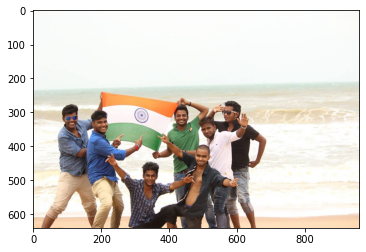

In [ ]:
filename = "sss.jpg"
img = read_file(filename)

org_img = np.copy(img)

creat edge Mark

In [ ]:
def edge_mask(img , line_size, blur_value):
    """
    input = grey scale image
    output = Edges of image
    """
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray , blur_value)

    edges  = cv2.adaptiveThreshold(gray_blur , 255, cv2.ADAPTIVE_THRESH_MEAN_C , 
    cv2.THRESH_BINARY , line_size, blur_value)

    return edges

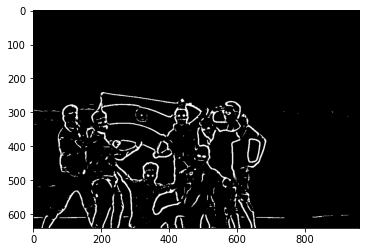

In [ ]:
line_size, blur_value = 9,9
edges = edge_mask(img , line_size, blur_value)

plt.imshow(edges, cmap= "binary")
plt.show()

reduce the color palette

In [ ]:
def color_Quantization(img, k):

    #transform the image
    data = np.float32(img).reshape((-1,3))

    #determaine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    #implimating Kmeans

    ret , label , center = cv2.kmeans(data, k , None , criteria , 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

<function matplotlib.pyplot.show(close=None, block=None)>

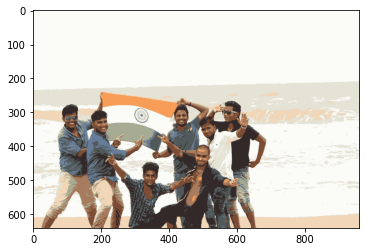

In [ ]:
imgs = color_Quantization(img, k=10)

plt.imshow(imgs)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

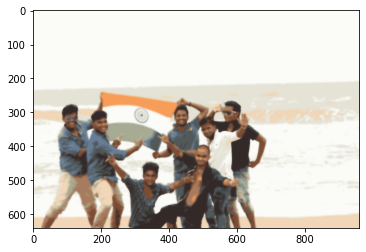

In [ ]:
#blured the imge

blured = cv2.bilateralFilter(imgs , d = 9 ,sigmaColor=300 , sigmaSpace=300)

plt.imshow(blured)
plt.show

# combine 

<function matplotlib.pyplot.show(close=None, block=None)>

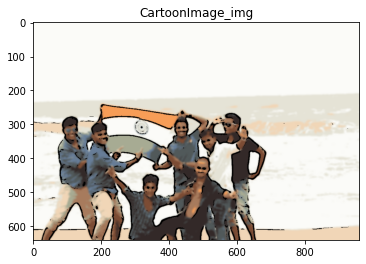

In [ ]:
cartoonImage = cv2.bitwise_and(blured, blured, mask=edges)

    
plt.imshow(cartoonImage)
plt.title("CartoonImage_img")
plt.show


In [ ]:

cv2.imwrite("Cortoonfieaa.jpg",cartoonImage)


True